# OBJETIVO

O objetivo deste notebook é aplicar um modelo de regressão linear para prever os preços das ações da ITUB3.SA (Itaú Unibanco), utilizando dados históricos de fechamento ajustado. O modelo é avaliado com a métrica RMSE para medir a precisão das previsões e, posteriormente, compara o preço previsto com o preço real no dia útil seguinte, proporcionando uma análise clara sobre a performance do modelo na previsão de preços de ações.

A data foi escolhida propositalmente fora do período da pandemia de COVID-19, poi, durante este tempo, os preços das ações foram altamente voláteis e influenciados por fatores externos atípicos, como instabilidade econômica, intervenções governamentais e mudanças abruptas no comportamento do mercado. Ao focar em um período antes da pandemia, o objetivo é testar a eficácia do modelo em um ambiente de mercado mais estável e com menos influência de eventos inesperados, garantindo uma avaliação mais consistente do desempenho da Regressão Linear para prever os preços das ações.

# BIBLIOTECAS

In [279]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# DADOS

In [281]:
#definindo as datas de início e fim
data_inicio = '2010-01-01'
data_fim = '2019-12-30'

#ação utilizada
carteira = 'itub3.sa'

#baixando os dados históricos da ação
df = yf.download(carteira, start=data_inicio, end=data_fim)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,13.655715,14.138378,13.655715,14.138378,7.306849,627000
2010-01-05,14.115611,14.161145,13.956241,14.161145,7.318619,183158
2010-01-06,14.161145,14.161145,13.965348,14.161145,7.318619,116395
2010-01-07,14.056416,14.070077,13.947134,14.024542,7.248022,136820
2010-01-08,13.974455,14.015436,13.719463,13.865173,7.165658,95971


Agora, vamos criar a variável alvo, chamada 'Target', que será usada para prever o preço de fechamento da ação no futuro.

O método shift() é usado para deslocar os dados para cima ou para baixo. Quando passamos -1 como argumento, estamos deslocando os valores da coluna 'Close' uma linha para cima, ou seja, o valor de fechamento do dia seguinte será atribuído à linha atual.

In [284]:
#Criando variável alvo
df['Target'] = df['Close'].shift(-1)

Observe que o último valor será nulo, porque não há um preço de fechamento disponível após o último dia do conjunto de dados.

In [286]:
df.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2019-12-27,32.279999,32.400002,31.84,32.16,25.594995,193800,NaN


Devemos apagar o valor nulo, pois não pode ser utilizado no treinamento do modelo de Regressão Linear.

In [288]:
# Remover os valores nulos criados pelas novas variáveis
df.dropna(inplace=True)

Por fim, vamos verificar se existe ainda algum valor nulo no dataset antes de aplicar o modelo.

In [290]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

# Regressão Linear

Nesta seção, iremos aplicar um modelo de regressão linear para prever o preço de fechamento das ações com base nos dados históricos.

In [294]:
X = df[['Close']].values  #variável preditora
y = df['Target'].values   #variável resposta

In [296]:
#dividindo o dataset em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [298]:
#criando o modelo de Regressão Linear
modelo = LinearRegression()

In [300]:
#treinando o modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [302]:
#fazendo previsões para o conjunto de teste
y_pred = modelo.predict(X_test)

In [304]:
#R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

#RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

R²: 0.9632347342214495
RMSE: 0.4510796521887435


C:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


O valor do R² valor indica que 96.3% da variação nos preços reais das ações pode ser explicada pelo modelo de Regressão Linear. Isso sugere que o modelo tem um excelente poder de explicação, ou seja, está capturando bem a relação entre as variáveis preditoras e o preço das ações.

Um RMSE de 0.45 indica que, em média, o modelo prevê os preços com uma diferença de R$ 0.45 em relação ao valor real, considerando todos os pontos do conjunto de dados.

Abaixo, é possível observar um gráfico de linha comparando os valores reais e as previsões.

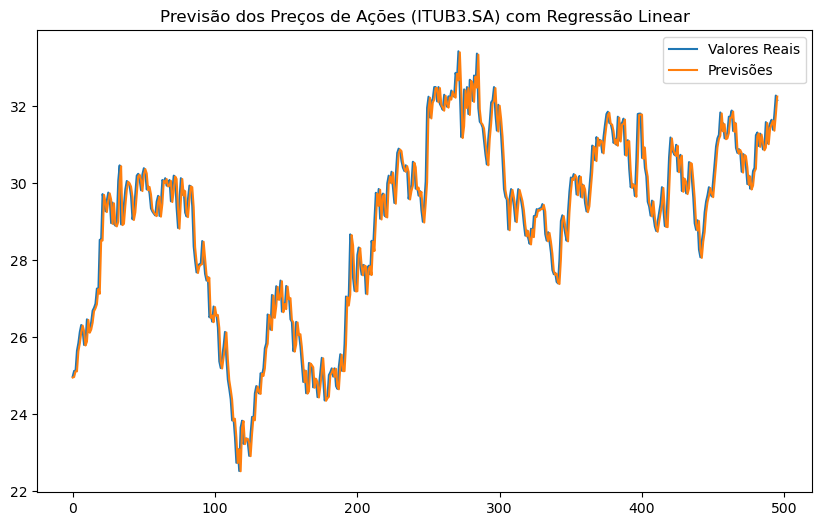

In [211]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsões')
plt.legend()
plt.title('Previsão dos Preços de Ações (ITUB3.SA) com Regressão Linear')
plt.show()

# COMPARANDO VALOR REAL COM VALOR PREVISTO NO PRÓXIMO DIA 

Para o dia 31/12/2019, vamos calcular e exibir o valor real e o valor previsto pelo modelo, e essa comparação direta nos dará uma noção mais clara de como o modelo está performando para esse ponto específico. A diferença entre os dois valores nos ajudará a avaliar a precisão do modelo

Embora o RMSE nos forneça o erro médio ao longo de todo o conjunto de dados, aqui podemos ver o erro específico no último dia.

In [307]:
# Obter o último preço de fechamento ajustado previsto para o dia 31/12/2019
preco_previsto = df['Adj Close'][-1]

C:\Users\Matheus\AppData\Local\Temp\ipykernel_2348\842980438.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_previsto = df['Adj Close'][-1]


In [309]:
#baixando o preço real da ação no próximo dia útil
data_comparacao = '2019-12-31'
dados_reais = yf.download(carteira, start=data_fim, end=data_comparacao)

[*********************100%***********************]  1 of 1 completed


In [311]:
#pegando o valor real do preço de fechamento ajustado no dia 31/12/2019 para comparar com a previsão
preco_real = dados_reais['Adj Close'][0]

C:\Users\Matheus\AppData\Local\Temp\ipykernel_2348\3625451765.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_real = dados_reais['Adj Close'][0]


In [313]:
#comparando o preço de fechamento ajustado previsto com o preço real
print(f"Preço previsto em {data_fim}: {preco_previsto}")
print(f"Preço real em {data_comparacao}: {preco_real}")

Preço previsto em 2019-12-30: 25.69048309326172
Preço real em 2019-12-31: 25.491525650024414


In [315]:
#calculando a diferença em valor absoluto
diferenca = abs(preco_real - preco_previsto)
print(f"Diferença entre o preço de fechamento ajustado real e o previsto para o dia 31/12/2019: {diferenca}")

Diferença entre o preço de fechamento ajustado real e o previsto para o dia 31/12/2019: 0.1989574432373047


# CONCLUSÃO

Neste notebook, aplicamos um modelo de regressão linear para prever os preços das ações da ITUB3.SA com base em dados históricos. A comparação entre o preço previsto e o preço real para o dia 31/12/2019 resultou em uma diferença de aproximadamente R$ 0.20, o que indica que o modelo apresentou um erro relativamente baixo para esse ponto específico.

Além disso, o RMSE de 0.45 ao longo de todo o período analisado demonstra que o modelo tem um bom desempenho geral, com uma margem de erro média de R$ 0.45 por previsão. O valor do R² de 0.96 confirma que o modelo explica 96% da variabilidade nos preços das ações, o que reforça sua precisão.

Embora a regressão linear tenha apresentado bons resultados neste estudo, ela não é a abordagem ideal para prever preços de ações devido a algumas limitações. O mercado de ações é altamente volátil e influenciado por diversos fatores não lineares, como eventos econômicos e políticos, que o modelo não consegue capturar adequadamente.